To-do:
•	Find out those columns which contain missing values – they might also contain some data entry errors. 
•	If you are able to detect any data entry error in any column with missing values, then convert these erroneous values to missing values forcibly (so that we can deal with them in the next step through MVA).
•	Now do MVA to seal with all missing values by using concepts taught in the class (and their relevant charts of missingno module)
o	Interpret each chart in 1-2 sentences
o	Define and justify your MVA strategy for each column


In [213]:
#importing the basic libraries
import pandas as pd
import numpy as np
%matplotlib inline

In [214]:
#read the CSV file
missingdf = pd.read_csv("nyc-rolling-sales-dirty.csv")

C:\Users\HP\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [215]:
#list all columns
missingdf.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [216]:
#see data types
missingdf.dtypes

# LOT should be integar and not object. Indicates erroenous and null data
# ZIP Code should not be float

Unnamed: 0                          int64
BOROUGH                             int64
NEIGHBORHOOD                       object
BUILDING CLASS CATEGORY            object
TAX CLASS AT PRESENT               object
BLOCK                             float64
LOT                                object
EASE-MENT                          object
BUILDING CLASS AT PRESENT          object
ADDRESS                            object
APARTMENT NUMBER                   object
ZIP CODE                          float64
RESIDENTIAL UNITS                   int64
COMMERCIAL UNITS                    int64
TOTAL UNITS                         int64
LAND SQUARE FEET                   object
GROSS SQUARE FEET                  object
YEAR BUILT                          int64
TAX CLASS AT TIME OF SALE           int64
BUILDING CLASS AT TIME OF SALE     object
SALE PRICE                         object
SALE DATE                          object
dtype: object

In [217]:
#we have 84k rows and 22 columns
missingdf.shape

(84548, 22)

In [218]:
#See the NaN values in some of the columns - these are the missing values. 
#Lot of NaN fields visible in the address and tax class.
missingdf

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392.0,No Number,,65000,NaN,...,5,0,5,1633,6440,1900,2,C2,6625000,why
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399.0,26,,C7,NaN,...,28,3,31,4616,18690,1900,2,C7,-,12/14/2016 0:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,399.0,39,,C7,NaN,...,16,1,17,2212,7803,1900,2,C7,-,12/9/2016 0:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,402.0,21,,C4,NaN,...,10,0,10,2272,6794,1913,2,C4,3936272,9/23/2016 0:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,404.0,55,,C2,NaN,...,6,0,6,2369,4615,1900,2,C2,8000000,11/17/2016 0:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349.0,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,11/28/2016 0:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349.0,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,4/21/2017 0:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351.0,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,7/5/2017 0:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100.0,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,12/21/2016 0:00


In [219]:
#using describe to summarise the dataset. With the result we canexamine the range of numerical values, to see if there are any far
#outside of our expected range.
#We can see that there are columns that have a minimum value of zero (0). 
#On some columns, a value of zero does not make sense and indicates an invalid or missing value for e.g.
#ZIP CODE field,
#residential units,
#commercial units, 
#total units,
#year built.
print(missingdf.describe())

         Unnamed: 0       BOROUGH         BLOCK      ZIP CODE  \
count  84548.000000  84548.000000  84532.000000  84512.000000   
mean   10344.359878      2.998758   4237.949735  10731.955521   
std     7151.779436      1.289790   3568.205692   1291.075851   
min        4.000000      1.000000      1.000000      0.000000   
25%     4231.000000      2.000000   1323.000000  10305.000000   
50%     8942.000000      3.000000   3311.000000  11209.000000   
75%    15987.250000      4.000000   6283.000000  11357.000000   
max    26739.000000      5.000000  16322.000000  11694.000000   

       RESIDENTIAL UNITS  COMMERCIAL UNITS   TOTAL UNITS    YEAR BUILT  \
count       84548.000000      84548.000000  84548.000000  84548.000000   
mean            2.025264          0.193559      2.249184   1789.322976   
std            16.721037          8.713183     18.972584    537.344993   
min             0.000000          0.000000      0.000000      0.000000   
25%             0.000000          0.000000  

In [220]:
# count the number of missing values for each column
num_missing = (missingdf[['BOROUGH','BLOCK', 'TAX CLASS AT PRESENT']] == 0).sum()
# report the results
print(num_missing)

BOROUGH                 0
BLOCK                   0
TAX CLASS AT PRESENT    0
dtype: int64


In [221]:
#Looking at the values of each column. This can help us see the mode of the columns as well 
for col in missingdf.columns:
    print(col + ":")
    print(missingdf[col].value_counts())
    print("")

Unnamed: 0:
2047     5
5475     5
1569     5
3616     5
5603     5
        ..
24488    1
24857    1
25611    1
24568    1
24453    1
Name: Unnamed: 0, Length: 26736, dtype: int64

BOROUGH:
4    26736
3    24047
1    18306
5     8410
2     7049
Name: BOROUGH, dtype: int64

NEIGHBORHOOD:
FLUSHING-NORTH              3068
UPPER EAST SIDE (59-79)     1736
UPPER EAST SIDE (79-96)     1590
UPPER WEST SIDE (59-79)     1439
BEDFORD STUYVESANT          1436
                            ... 
FRESH KILLS                    2
PELHAM BAY                     1
CITY ISLAND-PELHAM STRIP       1
EAST RIVER                     1
BRONX PARK                     1
Name: NEIGHBORHOOD, Length: 254, dtype: int64

BUILDING CLASS CATEGORY:
01 ONE FAMILY DWELLINGS                         18235
02 TWO FAMILY DWELLINGS                         15828
13 CONDOS - ELEVATOR APARTMENTS                 12989
10 COOPS - ELEVATOR APARTMENTS                  12902
03 THREE FAMILY DWELLINGS                        4348
07 RENTA

In [222]:
#we remove missings first. Let's see how many missings we have. there are not many missing values given the size of the data. 
#we will apply MVA on the Neighbourhood, building class category, tax class at present, block, address, zip code
missingdf.isnull().sum()

Unnamed: 0                         0
BOROUGH                            0
NEIGHBORHOOD                      30
BUILDING CLASS CATEGORY           51
TAX CLASS AT PRESENT               7
BLOCK                             16
LOT                                0
EASE-MENT                          0
BUILDING CLASS AT PRESENT          0
ADDRESS                           45
APARTMENT NUMBER                   1
ZIP CODE                          36
RESIDENTIAL UNITS                  0
COMMERCIAL UNITS                   0
TOTAL UNITS                        0
LAND SQUARE FEET                   0
GROSS SQUARE FEET                  0
YEAR BUILT                         0
TAX CLASS AT TIME OF SALE          0
BUILDING CLASS AT TIME OF SALE     0
SALE PRICE                         0
SALE DATE                          0
dtype: int64

In [223]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [224]:
import missingno as mano

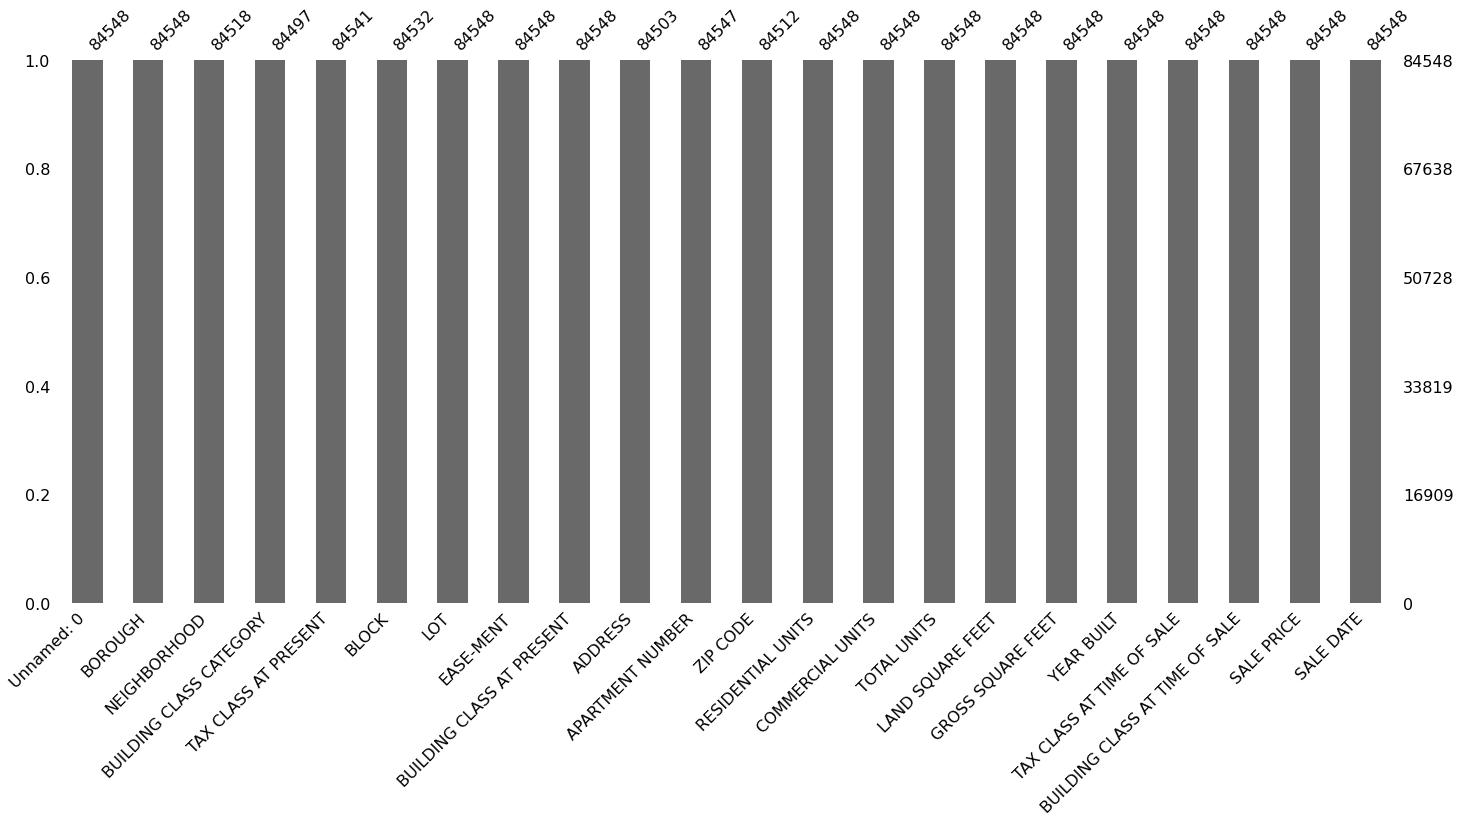

In [225]:
# visualize the location of the missingness of data using mano.matrix
mano.bar(missingdf)

In [226]:
#TAX CLASS AT PRESENT datatype is appearing as an object atm. we need to typecast it to a string but before that 
#Looking at the values of this column

missingdf['TAX CLASS AT PRESENT'].value_counts()

1     38633
2     30915
4      6140
2A     2520
2C     1915
1A     1444
1B     1234
2B      812
        738
1C      186
3         4
Name: TAX CLASS AT PRESENT, dtype: int64

In [227]:
#Converting 'TAX CLASS AT PRESENT' to string
missingdf['TAX CLASS AT PRESENT'] = missingdf['TAX CLASS AT PRESENT'].astype(str) 

In [228]:
#removing all alphabets from the tax class
missingdf['TAX CLASS AT PRESENT'] = missingdf['TAX CLASS AT PRESENT'].str.replace(r"[a-zA-Z]",'')

missingdf['TAX CLASS AT PRESENT'].value_counts()

1    41497
2    36162
4     6140
       738
         7
3        4
Name: TAX CLASS AT PRESENT, dtype: int64

In [229]:
#Replacing empty spaces with NaN
missingdf['TAX CLASS AT PRESENT']=missingdf['TAX CLASS AT PRESENT'].replace('',np.nan)
missingdf['TAX CLASS AT PRESENT']=missingdf['TAX CLASS AT PRESENT'].replace(' ',np.nan)
missingdf['TAX CLASS AT PRESENT'].value_counts()

1    41497
2    36162
4     6140
3        4
Name: TAX CLASS AT PRESENT, dtype: int64

In [230]:
missingdf.isnull().sum()

Unnamed: 0                          0
BOROUGH                             0
NEIGHBORHOOD                       30
BUILDING CLASS CATEGORY            51
TAX CLASS AT PRESENT              745
BLOCK                              16
LOT                                 0
EASE-MENT                           0
BUILDING CLASS AT PRESENT           0
ADDRESS                            45
APARTMENT NUMBER                    1
ZIP CODE                           36
RESIDENTIAL UNITS                   0
COMMERCIAL UNITS                    0
TOTAL UNITS                         0
LAND SQUARE FEET                    0
GROSS SQUARE FEET                   0
YEAR BUILT                          0
TAX CLASS AT TIME OF SALE           0
BUILDING CLASS AT TIME OF SALE      0
SALE PRICE                          0
SALE DATE                           0
dtype: int64

the above is giving a false depiction because lot of these columsn are showing 0 missign values although many are missing because of a "-" or a 0 in the field. 
Need to Treat that so that the missing values show correctly. Those columns are:
- LOT
- LAND SQUARE FEET
- GROSS SQUARE FEET
- SALE PRICE
- year built
- SALE DATE HAS NON NUMERIC VALUES THAT HAVETO BE REMOVED

In [231]:
#Converting this column to string
missingdf['LOT'] = missingdf['LOT'].astype(str) 

In [232]:
#Stripping the alphaetical characters in this column 
missingdf['LOT'] = missingdf['LOT'].str.replace(r"[a-zA-Z]",'')

In [233]:
#Stripping empty spaces in the column
missingdf['LOT'] = missingdf['LOT'].str.replace(' ','')

In [234]:
#Replacing empty spaces with NaN
missingdf['LOT']=missingdf['LOT'].replace('',np.nan)

In [235]:
missingdf.isnull().sum()

Unnamed: 0                          0
BOROUGH                             0
NEIGHBORHOOD                       30
BUILDING CLASS CATEGORY            51
TAX CLASS AT PRESENT              745
BLOCK                              16
LOT                                10
EASE-MENT                           0
BUILDING CLASS AT PRESENT           0
ADDRESS                            45
APARTMENT NUMBER                    1
ZIP CODE                           36
RESIDENTIAL UNITS                   0
COMMERCIAL UNITS                    0
TOTAL UNITS                         0
LAND SQUARE FEET                    0
GROSS SQUARE FEET                   0
YEAR BUILT                          0
TAX CLASS AT TIME OF SALE           0
BUILDING CLASS AT TIME OF SALE      0
SALE PRICE                          0
SALE DATE                           0
dtype: int64

In [236]:
#Converting this LAND SQUARE FEET column to string
missingdf['LAND SQUARE FEET']=missingdf['LAND SQUARE FEET'].astype(str)

In [237]:
#Stripping blank spaces
missingdf['LAND SQUARE FEET'] = missingdf['LAND SQUARE FEET'].str.replace(' ','')

In [238]:
#Replacing hyphens with NaN
missingdf['LAND SQUARE FEET']=missingdf['LAND SQUARE FEET'].replace('-',np.nan)

In [239]:
#Replacing 0 values with NaN
missingdf['LAND SQUARE FEET']=missingdf['LAND SQUARE FEET'].replace('0',np.nan)

In [240]:
missingdf['LAND SQUARE FEET'].value_counts()

#36578 NaN values in Land Square Feet 

2000    3919
2500    3470
4000    3044
1800    1192
3000    1190
        ... 
999        1
2732       1
6937       1
9804       1
6399       1
Name: LAND SQUARE FEET, Length: 6060, dtype: int64

In [241]:
#Counting the total available values in this column
missingdf['LAND SQUARE FEET'].count()

47970

now doing the same activity on GROSS SQUARE FEET

In [242]:
#Converting this GROSS SQUARE FEET column to string
missingdf['GROSS SQUARE FEET']=missingdf['GROSS SQUARE FEET'].astype(str)

In [243]:
#Stripping blank spaces
missingdf['GROSS SQUARE FEET'] = missingdf['GROSS SQUARE FEET'].str.replace(' ','')

In [244]:
#Replacing hyphens with NaN
missingdf['GROSS SQUARE FEET']=missingdf['GROSS SQUARE FEET'].replace('-',np.nan)

In [245]:
#Replacing 0 values with NaN
missingdf['GROSS SQUARE FEET']=missingdf['GROSS SQUARE FEET'].replace('0',np.nan)

In [246]:
#Counting the total available values in this column
missingdf['GROSS SQUARE FEET'].count()

45519

In [247]:
missingdf.isnull().sum()

#39029 missing values in Gross Square Feet
#36578 NaN values in Land Square Feet

Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                         30
BUILDING CLASS CATEGORY              51
TAX CLASS AT PRESENT                745
BLOCK                                16
LOT                                  10
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                              45
APARTMENT NUMBER                      1
ZIP CODE                             36
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  36578
GROSS SQUARE FEET                 39029
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                            0
SALE DATE                             0
dtype: int64

now doing the same activity on SALE PRICE

In [248]:
#Converting this column to string
missingdf['SALE PRICE']=missingdf['SALE PRICE'].astype(str)

In [249]:
#Stripping blanks
missingdf['SALE PRICE'] = missingdf['SALE PRICE'].str.replace(' ','')

In [250]:
#Replacing hyphens with NaN
missingdf['SALE PRICE']=missingdf['SALE PRICE'].replace('-',np.nan)

In [251]:
#Counting the total available values in this column
missingdf['SALE PRICE'].count()

69987

In [252]:
missingdf.isnull().sum()

#39029 missing values in Gross Square Feet
#36578 NaN values in Land Square Feet
#14561 missing values in Sale Price

Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                         30
BUILDING CLASS CATEGORY              51
TAX CLASS AT PRESENT                745
BLOCK                                16
LOT                                  10
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                              45
APARTMENT NUMBER                      1
ZIP CODE                             36
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  36578
GROSS SQUARE FEET                 39029
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

39029 missing values in Gross Square Feet
36578 NaN values in Land Square Feet
14561 missing values in Sale Price

GROSS SQUARE FEET and Year Built columns have a direct corelation. Whereever the year built is 0 , the gross value is also 0 or empty 

In [253]:
#Converting this column to string
missingdf['YEAR BUILT']=missingdf['YEAR BUILT'].astype(str)

In [254]:
missingdf['YEAR BUILT']

#there are 1900 values with a 0 that should be replaces with a NaN because it means nothing ...

0        1900
1        1900
2        1900
3        1913
4        1900
         ... 
84543    1998
84544    1998
84545    1925
84546    2001
84547    2006
Name: YEAR BUILT, Length: 84548, dtype: object

In [255]:
#Replacing 0 values with NaN
missingdf['YEAR BUILT']=missingdf['YEAR BUILT'].replace('0',np.nan)

In [256]:
missingdf.isnull().sum()

Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                         30
BUILDING CLASS CATEGORY              51
TAX CLASS AT PRESENT                745
BLOCK                                16
LOT                                  10
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                              45
APARTMENT NUMBER                      1
ZIP CODE                             36
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  36578
GROSS SQUARE FEET                 39029
YEAR BUILT                         6970
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [257]:
missingdf['SALE DATE']

0                   why 
1        12/14/2016 0:00
2         12/9/2016 0:00
3         9/23/2016 0:00
4        11/17/2016 0:00
              ...       
84543    11/28/2016 0:00
84544     4/21/2017 0:00
84545      7/5/2017 0:00
84546    12/21/2016 0:00
84547    10/27/2016 0:00
Name: SALE DATE, Length: 84548, dtype: object

In [258]:
#Looking at the grouped values
missingdf.groupby(by='SALE DATE').count()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
SALE DATE,,,,,,,,,,,,,,,,,,,,,
1/1/2017 0:00,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,19,18,28,30,30,14
1/10/2017 0:00,314,314,314,314,314,314,313,314,314,314,...,314,314,314,314,168,155,291,314,314,258
1/11/2017 0:00,328,328,328,327,328,328,328,328,328,328,...,328,328,328,328,184,180,302,328,328,280
1/12/2017 0:00,395,395,395,393,395,395,395,395,395,394,...,395,395,395,395,218,205,363,395,395,347
1/13/2017 0:00,326,326,326,326,326,326,326,326,326,326,...,324,326,326,326,206,196,308,326,326,268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9/8/2016 0:00,376,376,376,376,376,376,376,376,376,375,...,376,376,376,376,209,205,348,376,376,317
9/9/2016 0:00,336,336,336,336,336,336,336,336,336,336,...,336,336,336,336,190,179,306,336,336,285
later,1,1,1,1,0,1,1,1,1,0,...,0,1,1,1,1,1,1,1,1,0


In [259]:
#Replacing value with NaN
missingdf['SALE DATE'].replace({'later': np.nan}, inplace=True)

In [260]:
#Replacing value with NaN
missingdf['SALE DATE'].replace({'not sure': np.nan}, inplace=True)

In [261]:
#Replacing value with NaN
missingdf['SALE DATE'].replace({'why ': np.nan}, inplace=True)

In [262]:
#Looking at the grouped values
missingdf.groupby(by='SALE DATE').count()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
SALE DATE,,,,,,,,,,,,,,,,,,,,,
1/1/2017 0:00,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,19,18,28,30,30,14
1/10/2017 0:00,314,314,314,314,314,314,313,314,314,314,...,314,314,314,314,168,155,291,314,314,258
1/11/2017 0:00,328,328,328,327,328,328,328,328,328,328,...,328,328,328,328,184,180,302,328,328,280
1/12/2017 0:00,395,395,395,393,395,395,395,395,395,394,...,395,395,395,395,218,205,363,395,395,347
1/13/2017 0:00,326,326,326,326,326,326,326,326,326,326,...,324,326,326,326,206,196,308,326,326,268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9/5/2016 0:00,6,6,6,6,6,6,6,6,6,5,...,6,6,6,6,4,3,5,6,6,2
9/6/2016 0:00,249,249,249,249,249,248,249,249,249,249,...,248,249,249,249,140,136,233,249,249,205
9/7/2016 0:00,457,457,456,457,457,456,457,457,457,457,...,457,457,457,457,213,204,430,457,457,337


In [263]:
#SEEING THE OVERALL PICTURE OF THE DATA WITH MISSING VALUES THAT HAS TO BE TREATED

missingdf.isnull().sum()

Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                         30
BUILDING CLASS CATEGORY              51
TAX CLASS AT PRESENT                745
BLOCK                                16
LOT                                  10
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                              45
APARTMENT NUMBER                      1
ZIP CODE                             36
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  36578
GROSS SQUARE FEET                 39029
YEAR BUILT                         6970
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             3
dtype: int64

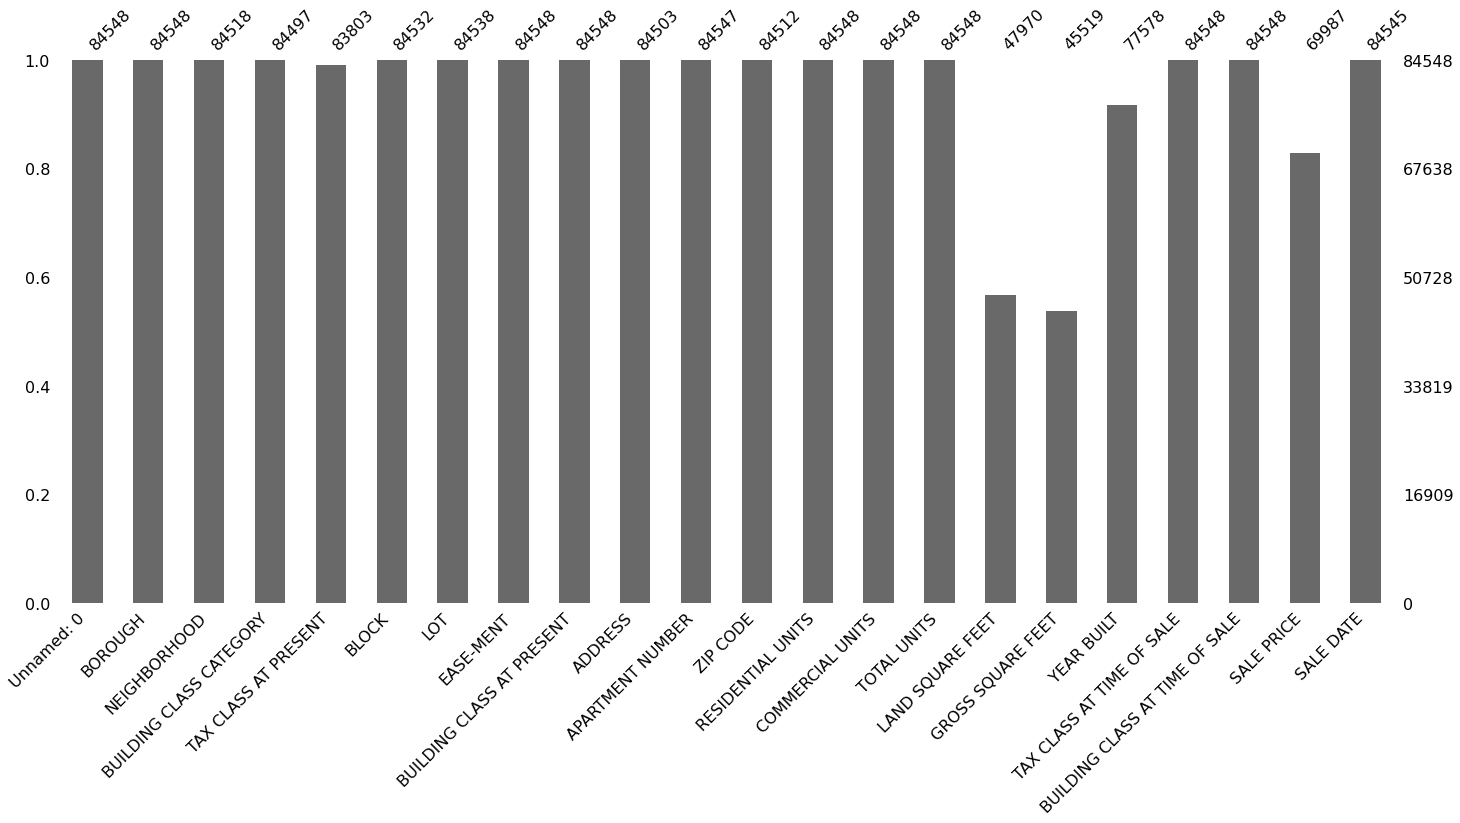

In [264]:
# visualize the location of the missingness of data using mano.matrix
mano.bar(missingdf)

In the above chart we can clearly see that in most columns the data missing is negligible and we can drop those missign values from the analysis because it will not impact the analysis or findings. However, if we see the LAND SQUARE FEET and GROSS SQUARE FEET columns, they have more then 35k missing records (around 40%). Theoretically, 25 to 30% is the maximum missing values are allowed, beyond which we might want to drop the variable from analysis. Practically this varies.At times we get variables with ~50% of missing values but still the client insists to have it for analyzing. It really depends on the importance of those columns. For the purposes of this activity , we will ignore these two columns. 
Sale Price also has 14561 missing records , but we will use some technique to fill that data because that column is of importance. 

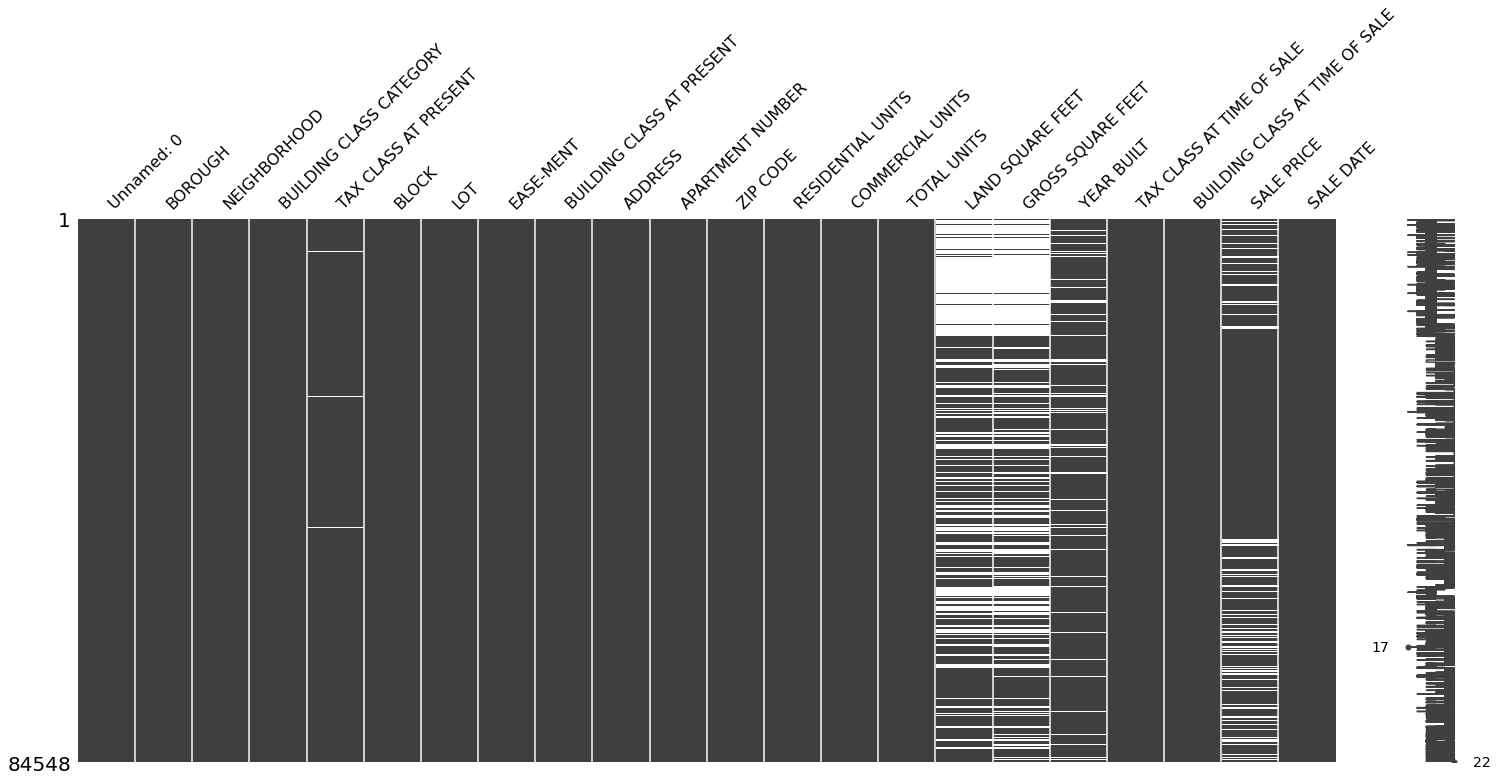

In [265]:
#Making a matric showing the missing values and where they are missing
mano.matrix(missingdf)

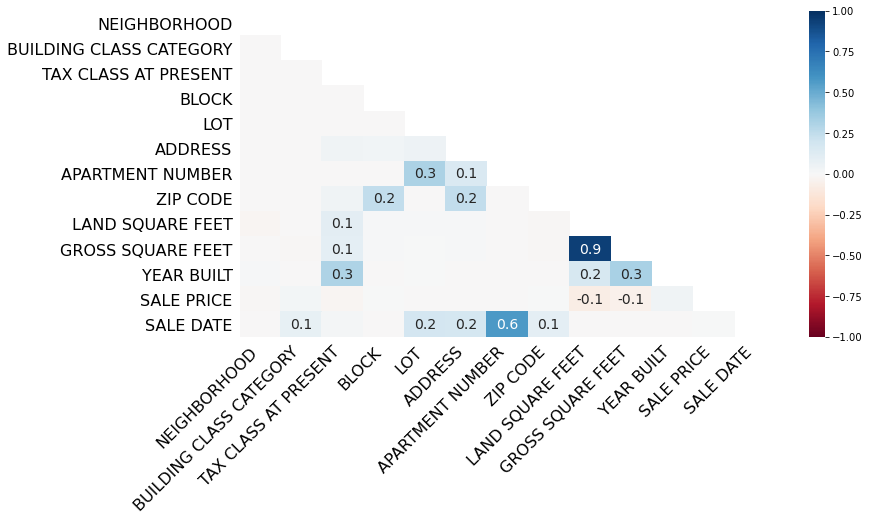

In [266]:
mano.heatmap(missingdf, figsize=(12,6))

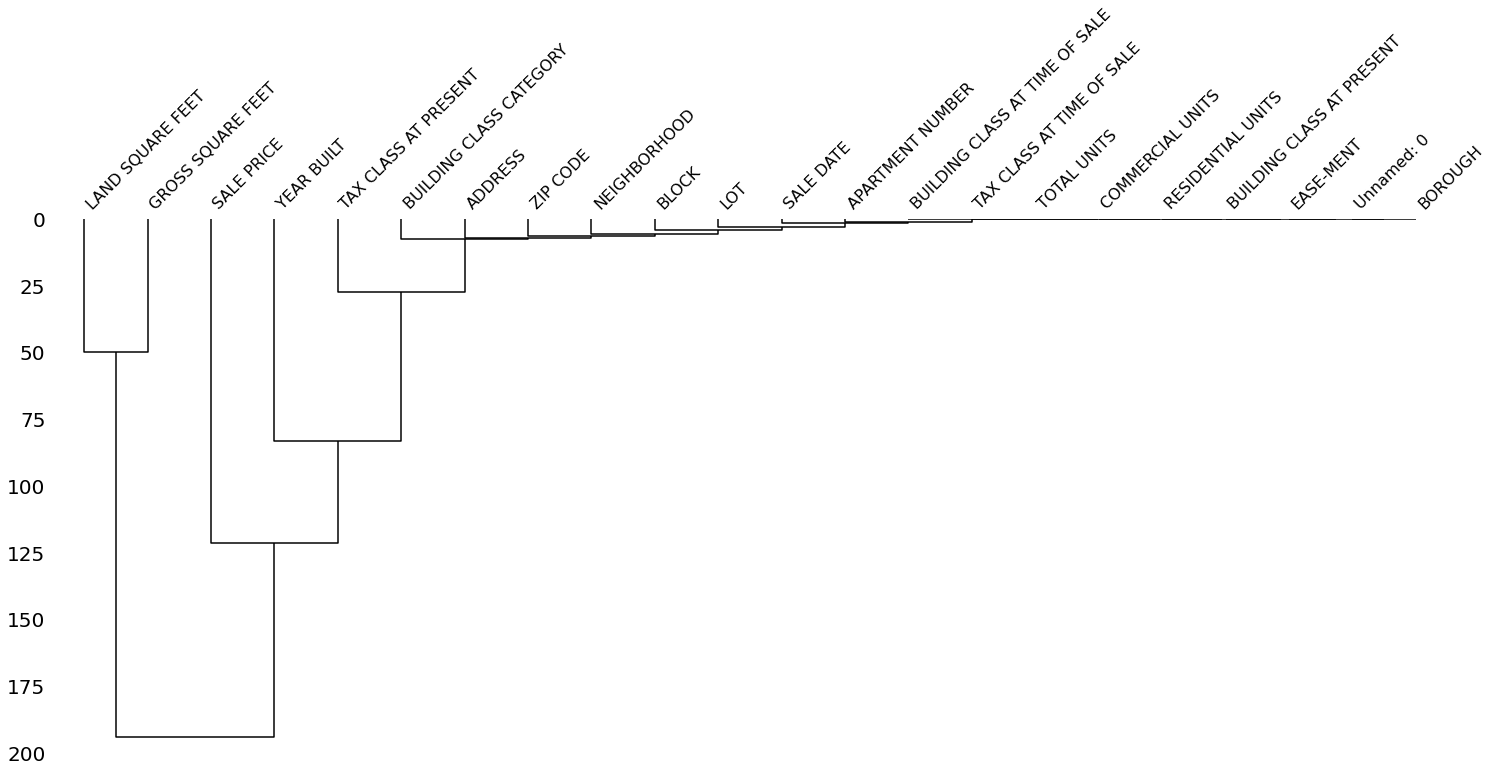

In [267]:
mano.dendrogram(missingdf)

From the above, we can see that columns that are combined with a straight line, they do not contain any missing values. For all the remaining, there is a correlation so that further confirms MAR

Handling Missing Values
Dropping Entire Rows
If the missing values are not that much (just a few rows), we can drop them. However, this is done for MCAR, which we have not been able to prove from the above diagrams

In [268]:
missingdf.isnull().sum()

Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                         30
BUILDING CLASS CATEGORY              51
TAX CLASS AT PRESENT                745
BLOCK                                16
LOT                                  10
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                              45
APARTMENT NUMBER                      1
ZIP CODE                             36
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  36578
GROSS SQUARE FEET                 39029
YEAR BUILT                         6970
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             3
dtype: int64

In [271]:
#dropping missing values of NEIGHBORHOOD
missingdf = missingdf.dropna(axis=0, subset=['NEIGHBORHOOD'])
#dropping missing values of BUILDING CLASS CATEGORY
missingdf = missingdf.dropna(axis=0, subset=['BUILDING CLASS CATEGORY'])
#dropping missing values of TAX CLASS AT PRESENT
missingdf = missingdf.dropna(axis=0, subset=['TAX CLASS AT PRESENT'])
#dropping missing values of block
missingdf = missingdf.dropna(axis=0, subset=['BLOCK'])
#dropping missing values of lot
missingdf = missingdf.dropna(axis=0, subset=['LOT'])
#dropping missing values of ADDRESS
missingdf = missingdf.dropna(axis=0, subset=['ADDRESS'])
#dropping missing values of ZIP CODE
missingdf = missingdf.dropna(axis=0, subset=['ZIP CODE'])
#dropping missing values of SALE DATE
missingdf = missingdf.dropna(axis=0, subset=['SALE DATE'])


In [272]:
missingdf.shape

#shape of the data has changed 

(83640, 22)

In [273]:
#check
missingdf.isnull().sum()

Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  35768
GROSS SQUARE FEET                 38209
YEAR BUILT                         6224
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14450
SALE DATE                             0
dtype: int64

Need to treat SALE PRICE now. We can impute through mean, median and mode. We will use mean to plug in the values. We could have used KNN based imputation to predict the sales price but there are no clearly defined variables apart from Gross Square Feet and Land Square Feet that are closely corelated to Sale Price and because Gross Square Feet and Land Square Feet have lot of missign values, we cannot use those to precist Sale price. 

In [274]:
from sklearn.impute import SimpleImputer

#create a separate data frame for mean imputation
missingdf_mean = missingdf.copy(deep=True)

mean_imputation = SimpleImputer(strategy='mean')

#take only columns where mean imputation matters, i.e., numerical columns
missingdf_mean[['SALE PRICE']] = mean_imputation.fit_transform(missingdf_mean[['SALE PRICE']])

In [275]:
missingdf

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
18,22,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373.0,49,,C6,"311 EAST 3RD STREET, 17",...,0,0,0,NaN,NaN,1920,2,C6,450000,9/1/2016 0:00
19,23,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373.0,49,,C6,"311 EAST 3RD, 22",...,0,0,0,NaN,NaN,1920,2,C6,510000,8/17/2017 0:00
20,24,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,374.0,8,,C6,"702 EAST 5TH STREET, 5E",...,0,0,0,NaN,NaN,1900,2,C6,NaN,9/7/2016 0:00
21,25,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,375.0,30,,C6,"742 EAST 6TH STREET, 1",...,0,0,0,NaN,NaN,1902,2,C6,350000,8/30/2017 0:00
22,26,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,376.0,14,,C6,244 EAST 7TH STREET,...,24,0,24,4131,16776,1928,2,C6,11900000,6/21/2017 0:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349.0,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,11/28/2016 0:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349.0,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,4/21/2017 0:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351.0,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,7/5/2017 0:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100.0,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,12/21/2016 0:00


In [276]:
missingdf_mean

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
18,22,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373.0,49,,C6,"311 EAST 3RD STREET, 17",...,0,0,0,NaN,NaN,1920,2,C6,4.500000e+05,9/1/2016 0:00
19,23,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373.0,49,,C6,"311 EAST 3RD, 22",...,0,0,0,NaN,NaN,1920,2,C6,5.100000e+05,8/17/2017 0:00
20,24,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,374.0,8,,C6,"702 EAST 5TH STREET, 5E",...,0,0,0,NaN,NaN,1900,2,C6,1.267198e+06,9/7/2016 0:00
21,25,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,375.0,30,,C6,"742 EAST 6TH STREET, 1",...,0,0,0,NaN,NaN,1902,2,C6,3.500000e+05,8/30/2017 0:00
22,26,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,376.0,14,,C6,244 EAST 7TH STREET,...,24,0,24,4131,16776,1928,2,C6,1.190000e+07,6/21/2017 0:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349.0,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,4.500000e+05,11/28/2016 0:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349.0,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,5.500000e+05,4/21/2017 0:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351.0,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,4.600000e+05,7/5/2017 0:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100.0,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,1.169334e+07,12/21/2016 0:00


In [277]:
#check
missingdf_mean.isnull().sum()

Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  35768
GROSS SQUARE FEET                 38209
YEAR BUILT                         6224
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                            0
SALE DATE                             0
dtype: int64

In [278]:
#Looking at the proportion of missing values
missingdf.isnull().mean()

Unnamed: 0                        0.000000
BOROUGH                           0.000000
NEIGHBORHOOD                      0.000000
BUILDING CLASS CATEGORY           0.000000
TAX CLASS AT PRESENT              0.000000
BLOCK                             0.000000
LOT                               0.000000
EASE-MENT                         0.000000
BUILDING CLASS AT PRESENT         0.000000
ADDRESS                           0.000000
APARTMENT NUMBER                  0.000000
ZIP CODE                          0.000000
RESIDENTIAL UNITS                 0.000000
COMMERCIAL UNITS                  0.000000
TOTAL UNITS                       0.000000
LAND SQUARE FEET                  0.427642
GROSS SQUARE FEET                 0.456827
YEAR BUILT                        0.074414
TAX CLASS AT TIME OF SALE         0.000000
BUILDING CLASS AT TIME OF SALE    0.000000
SALE PRICE                        0.172764
SALE DATE                         0.000000
dtype: float64

Year Built is missing only 7% of the values ; either we can disregard it or repalce it with mode. For the other 2 variables with more than 42% and 45% missing values, we will disregard those columns (LAND SQAURE FEET AND GROSS SQUARE FEET) 

In [283]:
print(missingdf.mode())

      Unnamed: 0  BOROUGH    NEIGHBORHOOD  \
0             22      4.0  FLUSHING-NORTH   
1             23      NaN             NaN   
2             24      NaN             NaN   
3             25      NaN             NaN   
4             26      NaN             NaN   
...          ...      ...             ...   
6669        7048      NaN             NaN   
6670        7049      NaN             NaN   
6671        7050      NaN             NaN   
6672        7051      NaN             NaN   
6673        7052      NaN             NaN   

                          BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  \
0     01 ONE FAMILY DWELLINGS                                        1   
1                                             NaN                  NaN   
2                                             NaN                  NaN   
3                                             NaN                  NaN   
4                                             NaN                  NaN   
...            

In [287]:
#let us replace the one missing value by the mode, i.e., 1920
missingdf_mean['YEAR BUILT'].fillna(1920,inplace=True)
missingdf_mean.isnull().sum()

Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  35768
GROSS SQUARE FEET                 38209
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                            0
SALE DATE                             0
dtype: int64

In [288]:
#FINAL LOOK OF DATA 
missingdf_mean

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
18,22,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373.0,49,,C6,"311 EAST 3RD STREET, 17",...,0,0,0,NaN,NaN,1920,2,C6,4.500000e+05,9/1/2016 0:00
19,23,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373.0,49,,C6,"311 EAST 3RD, 22",...,0,0,0,NaN,NaN,1920,2,C6,5.100000e+05,8/17/2017 0:00
20,24,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,374.0,8,,C6,"702 EAST 5TH STREET, 5E",...,0,0,0,NaN,NaN,1900,2,C6,1.267198e+06,9/7/2016 0:00
21,25,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,375.0,30,,C6,"742 EAST 6TH STREET, 1",...,0,0,0,NaN,NaN,1902,2,C6,3.500000e+05,8/30/2017 0:00
22,26,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,376.0,14,,C6,244 EAST 7TH STREET,...,24,0,24,4131,16776,1928,2,C6,1.190000e+07,6/21/2017 0:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349.0,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,4.500000e+05,11/28/2016 0:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349.0,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,5.500000e+05,4/21/2017 0:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351.0,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,4.600000e+05,7/5/2017 0:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100.0,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,1.169334e+07,12/21/2016 0:00
